In [1]:
import matplotlib.gridspec as grid_spec
import matplotlib.pyplot as plt
import numpy as np

import torch

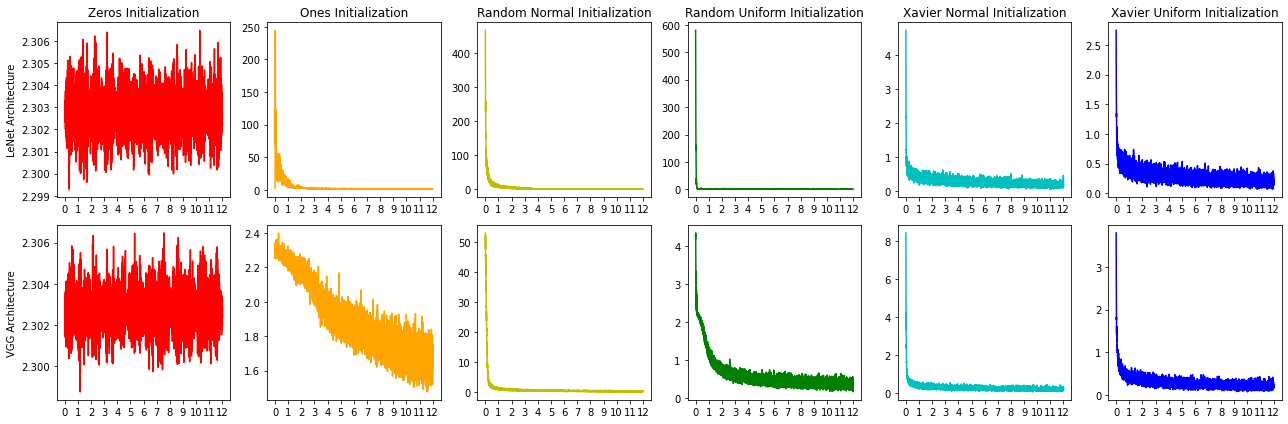

In [112]:
# generate loss plots for LeNet model on different weight initialization methods

lenet_loss_z = np.load('experiments/weightinit/lenet-zeros-bn/loss.npy')
lenet_loss_o = np.load('experiments/weightinit/lenet-ones-bn/loss.npy')
lenet_loss_n = np.load('experiments/weightinit/lenet-normal-bn/loss.npy')
lenet_loss_u = np.load('experiments/weightinit/lenet-uniform-bn/loss.npy')
lenet_loss_xn = np.load('experiments/weightinit/lenet-xaviernorm-bn/loss.npy')
lenet_loss_xu = np.load('experiments/weightinit/lenet-xavieruniform-bn/loss.npy')

vgg_loss_z = np.load('experiments/weightinit/vgg-zeros-bn/loss.npy')
vgg_loss_o = np.load('experiments/weightinit/vgg-ones-bn/loss.npy')
vgg_loss_n = np.load('experiments/weightinit/vgg-normal-bn/loss.npy')
vgg_loss_u = np.load('experiments/weightinit/vgg-uniform-bn/loss.npy')
vgg_loss_xn = np.load('experiments/weightinit/vgg-xaviernorm-bn/loss.npy')
vgg_loss_xu = np.load('experiments/weightinit/vgg-xavieruniform-bn/loss.npy')

fig, axs = plt.subplots(2, 6, figsize=(18, 6))

axs[0,0].plot(lenet_loss_z.reshape(-1), color='r')
axs[0,0].set_title("Zeros Initialization")
axs[0,0].set_ylabel("LeNet Architecture")
axs[0,0].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,0].plot(vgg_loss_z.reshape(-1), color='r')
axs[1,0].set_ylabel("VGG Architecture")
axs[1,0].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[0,1].plot(lenet_loss_o.reshape(-1), color='orange')
axs[0,1].set_title("Ones Initialization")
axs[0,1].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,1].plot(vgg_loss_o.reshape(-1), color='orange')
axs[1,1].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[0,2].plot(lenet_loss_n.reshape(-1), color='y')
axs[0,2].set_title("Random Normal Initialization")
axs[0,2].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,2].plot(vgg_loss_n.reshape(-1), color='y')
axs[1,2].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[0,3].plot(lenet_loss_u.reshape(-1), color='g')
axs[0,3].set_title("Random Uniform Initialization")
axs[0,3].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,3].plot(vgg_loss_u.reshape(-1), color='g')
axs[1,3].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[0,4].plot(lenet_loss_xn.reshape(-1), color='c')
axs[0,4].set_title("Xavier Normal Initialization")
axs[0,4].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,4].plot(vgg_loss_xn.reshape(-1), color='c')
axs[1,4].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[0,5].plot(lenet_loss_xu.reshape(-1), color='b')
axs[0,5].set_title("Xavier Uniform Initialization")
axs[0,5].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,5].plot(vgg_loss_xu.reshape(-1), color='b')
axs[1,5].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

fig.tight_layout()
#plt.savefig('experiments/weightinit/combined-losses.png', dpi=300)
plt.show()

In [141]:
def extract_data():
    loss = np.load('experiments/weightinit/vgg-normal-bn/loss.npy')
    params = torch.load('experiments/weightinit/vgg-normal-bn/param.pt')
    gradients = torch.load('experiments/weightinit/vgg-normal-bn/grad.pt')
    return loss, params, gradients

In [142]:
loss, params, gradients = extract_data()

In [159]:
params['13.weight'].shape

(12, 12, 720)

In [157]:
params['13.weight'].shape

data = params['13.weight'][0][0]

all_plots = []

for i in range(12):
    for j in range(12):
        fig, ax = plt.subplots(figsize=(5, 5))
        
        data = params['13.weight'][i][j]
        x_d = np.linspace(-0.93, 0.93, 100)
        y_d, _ = np.histogram(a=data, bins=100, range=(-0.93, 0.93), density=True)
        ax.plot(x_d, y_d)
        if j == 0:
            ax.set_title(f"Epoch = {i+1}")
        
        fig.canvas.draw()
        plot = np.array(fig.canvas.renderer.buffer_rgba())
        plt.close(fig)
        all_plots.append(plot)
        #plt.plot(x_d, y_d)
        #plt.show()

all_plots = np.stack(all_plots, axis=0)
np.save('sequential.npy', all_plots)

In [163]:
import imageio
writer = imageio.get_writer('experiments/weightinit/testing.mp4', fps=30)
plots = np.load('sequential.npy')

print(plots.shape)

for img in plots:
    writer.append_data(img)
writer.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (360, 360) to (368, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


(144, 360, 360, 4)


Mean: 0.00033258658
Standard deviation: 0.010424276


Mean: 4.7709258e-05
Standard deviation: 0.010741728


Mean: 0.0013950972
Standard deviation: 0.009811066


Mean: 0.0008588544
Standard deviation: 0.011162235


Mean: -0.00056323287
Standard deviation: 0.011739921


Mean: -0.0010567132
Standard deviation: 0.0127222445


Mean: -0.0016790554
Standard deviation: 0.014021297


Mean: 0.00087425386
Standard deviation: 0.013992613


Mean: -0.002399986
Standard deviation: 0.018232098


Mean: -0.002964912
Standard deviation: 0.019981464


Mean: 0.0011157556
Standard deviation: 0.030848878


Mean: -0.03817897
Standard deviation: 0.20985419




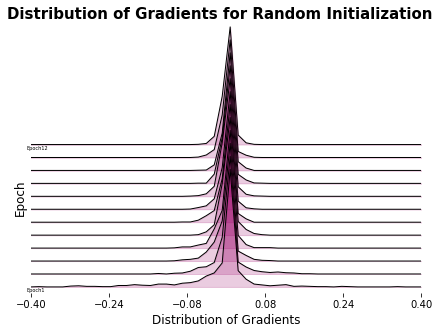

In [145]:
# ridge plots modeled after https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
def viz_gradients():
    
    color = '#990066'; outline = '#000000'
    
    weights = params['0.weight']

    gs = grid_spec.GridSpec(weights.shape[0], ncols=1) # epochs by 1
    fig = plt.figure(figsize=(7,5))

    ax_objs = []
    spines = ["top", "right", "left", "bottom"]
    x_low = -0.4; x_high = 0.4

    for epoch in reversed(range(weights.shape[0])):
        # breakpoint()
        data = weights[epoch].reshape(-1, 1).squeeze() # line up all data points in one line
        print("Mean: " + str(np.mean(data)))
        print("Standard deviation: " + str(np.std(data)))
        print("\n")
        #density = kde.gaussian_kde(data)
        x_d = np.linspace(x_low, x_high, 50)
        y_d, _ = np.histogram(a=data, bins=50, range=(x_low, x_high), density=True)
        #y_d = density(x_d)


        ax_objs.append(fig.add_subplot(gs[weights.shape[0]-1-epoch:weights.shape[0]-epoch, 0:]))
        ax_objs[-1].plot(x_d, y_d, color=outline, lw=1)
        ax_objs[-1].fill_between(x_d, y_d, alpha=0.2, color=color)

        ax_objs[-1].set_xlim(x_low, x_high)

        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        ax_objs[-1].set_yticks([])
        if epoch == 0:
            ax_objs[-1].set_xlabel("Distribution of Gradients", fontsize=12)
            ax_objs[-1].set_xticks(np.arange(x_low, x_high + 1e-5, (x_high - x_low) / 5))
        else:
            ax_objs[-1].set_xticks([])

        if epoch == 0 or epoch == weights.shape[0] - 1:
            ax_objs[-1].set_ylabel("Epoch" + str(epoch + 1), fontsize=5, loc='bottom', rotation='horizontal')

        if epoch == np.ceil(weights.shape[0] / 2):
            ax_objs[-1].set_ylabel("Epoch", fontsize=12, loc='bottom')

        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)

    gs.update(hspace=-0.9)
    fig.suptitle("Distribution of Gradients for Random Initialization", fontweight='bold', fontsize=15, y=0.92)
    # plt.title("Distribution of Gradients for Zeros Initialization", fontweight='bold', fontsize=15)
    # plt.savefig("random_init_gradients.pdf")
    # plt.tight_layout()
    plt.show()

viz_gradients()

In [58]:
gradients['4.weight'].shape

(12, 12, 864)

In [20]:
gradients['4.weight'][6].max()

0.5432024